In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [141]:
NUM = 11

In [142]:
df = pd.read_csv("bank.csv")

In [143]:
# ilk beş değer
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [144]:
# son beş değer
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,0


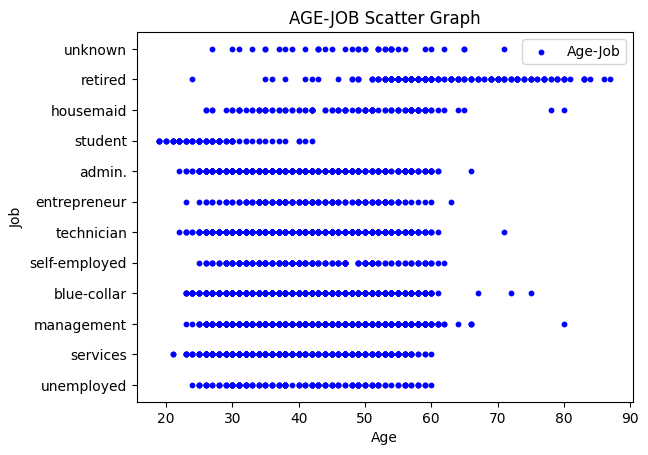

In [145]:
# AGE-JOB scatter grafiği
plt.scatter(df['age'], df['job'], s=10, c='blue', label='Age-Job')
plt.title('AGE-JOB Scatter Graph')
plt.xlabel('Age')
plt.ylabel('Job')
plt.legend()
plt.show()

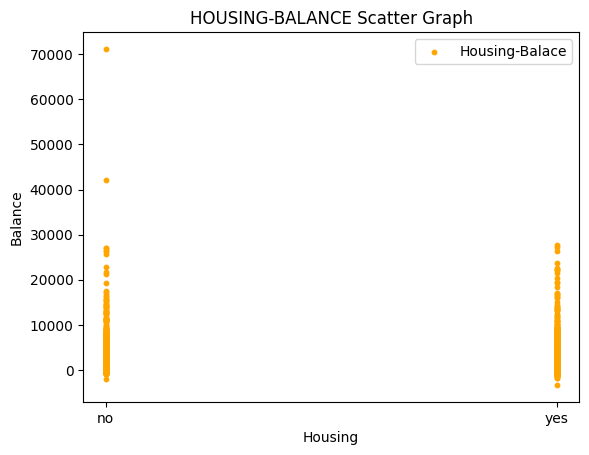

In [146]:
# HOUSING-BALANCE scatter grafiği
plt.scatter(df['housing'], df['balance'], s=10, c='orange', label='Housing-Balace')
plt.title('HOUSING-BALANCE Scatter Graph')
plt.xlabel('Housing')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [147]:
# DURATION değeri NUM (11) değerinden fazla olan kişi sayısı
kisi_sayisi = (df['duration'] > NUM).sum()
kisi_sayisi

4467

In [148]:
# Veri setinin correlation matrisi
corr_matrix = df.corr()
corr_matrix

<ipython-input-148-0e8440561095>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


In [149]:
# Her bir özellik kendisiyle en iyi pozitif korelasyona sahiptir.
# Veri setinde pozitif korelasyonu en fazla olan özellikler (kendileri hariç tutularak): pdays-previous (0.577562)

# Veri setinde negatif korelasyonu en fazla olan özellikler: day-pdays (-0.094352)

# Veri setinde korelasyonu en az olan özellikler: age-duration (-0.002367)

In [150]:
# Veri setinde sayısal olmayan kolonları (MARITAL, EDUCATION, HOUSING, LOAN) sayısallaştırma
df['marital'] = df['marital'].map({'married':1, 'single':0, 'divorced':2})
df['education'] = df['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown':-1})
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df['loan'] = df['loan'].map({'no':1, 'yes':0})

In [151]:
# Sayısallaştırılmış kolonların son hali
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,0,no,1787,0,1,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,1,1,no,4789,1,0,cellular,11,may,220,1,339,4,failure,0
2,35,management,0,2,no,1350,1,1,cellular,16,apr,185,1,330,1,failure,0
3,30,management,1,2,no,1476,1,0,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,1,1,no,0,1,1,unknown,5,may,226,1,-1,0,unknown,0


In [152]:
# AGE, MARITAL, EDUCATION, HOUSING, LOAN, BALANCE, DURATION kolonlarını içeren yeni veri seti oluşturma
new_df = df[['age', 'marital', 'education', 'housing', 'loan', 'balance', 'duration']]
new_df.head()

,age,marital,education,housing,loan,balance,duration
0,30,1,0,0,1,1787,79
1,33,1,1,1,0,4789,220
2,35,0,2,1,1,1350,185
3,30,1,2,1,0,1476,199
4,59,1,1,1,1,0,226


In [153]:
# BALANCE kolunundaki her bir değeri NUM değeri ile çarpma
new_df['balance'] = new_df['balance'] * NUM

# Veri setinin son hali
new_df.head()

<ipython-input-153-ca009fb1b52c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['balance'] = new_df['balance'] * NUM


,age,marital,education,housing,loan,balance,duration
0,30,1,0,0,1,19657,79
1,33,1,1,1,0,52679,220
2,35,0,2,1,1,14850,185
3,30,1,2,1,0,16236,199
4,59,1,1,1,1,0,226


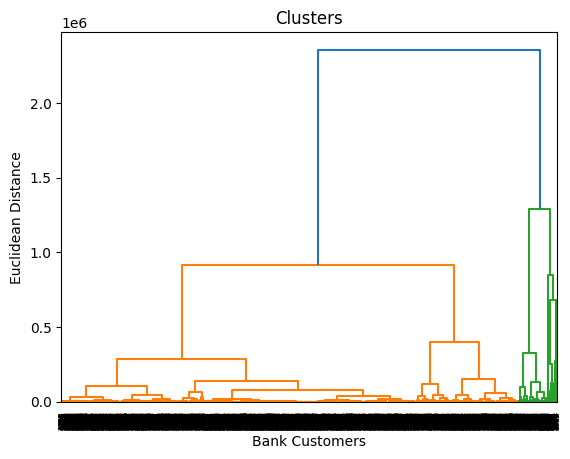

In [154]:
# Yeni veri seti kullanarak Dendrogram yardımı ile sınıflandırma sayısını bulma
new_df_vals = new_df.iloc[:, :].values

dendrogram = sch.dendrogram(sch.linkage(new_df_vals, method='ward'))
plt.xlabel('Bank Customers')
plt.ylabel('Euclidean Distance')
plt.title('Clusters')
plt.show()

In [155]:
# Yeni veri seti kullanarak Hierarchical Clustering uygulama
# Dendrogram grafiğine yardımı ile sınıflandırma sayısı 5 olarak bulundu
hier_clust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Her bir değeri uygun kümelere yerleştirme
hier_clust_pred = hier_clust.fit_predict(new_df_vals)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [156]:
# Orjinal veri setinde Y sütunundaki sınıflandırma ve Hierarchial clustering ile
# bulunan sınıflandırma sonuçlarını karşılaştırarak başarım oranını bulma
y_values = df.iloc[:, [16]].values
y_values_pred = hier_clust.fit_predict(y_values)

succes_rate = adjusted_rand_score(y_values_pred, hier_clust_pred)
succes_rate

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.03192187486191843